In [55]:
def splitData(X, Y=None, train_fraction=0.80):
    """
    Split data into training and test data.

    Parameters
    ----------
    X : MxN numpy array of data to split
    Y : Mx1 numpy array of associated target values
    train_fraction : float, fraction of data used for training (default 80%)

    Returns
    -------
    to_return : (Xtr,Xte,Ytr,Yte) or (Xtr,Xte)
        A tuple containing the following arrays (in order): training
        data from X, testing data from X, training labels from Y
        (if Y contains data), and testing labels from Y (if Y 
        contains data).
    """
    nx,dx = twod(X).shape
    ne = int(round(train_fraction * nx))

    Xtr,Xte = X[:ne,:], X[ne:,:]
    to_return = (Xtr,Xte)

    if Y is not None:
        Y = arr(Y).flatten()
        ny = len(Y)
        if ny > 0:
            assert ny == nx, 'splitData: X and Y must have the same length'
            Ytr,Yte = Y[:ne], Y[ne:]
            to_return += (Ytr,Yte)

    return to_return

In [1]:
import numpy as np
import sklearn as sk
import os
from numpy import asarray as arr
from numpy import atleast_2d as twod
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
os.chdir(r'C:\Users\Joyce\Documents\178\project\formated_data')

X = np.loadtxt('X_train.txt')
Y = np.loadtxt('Y_train.txt')
X_final = np.loadtxt('X_test.txt')
print(X.shape)

sel = VarianceThreshold(0.5)
X_new = sel.fit_transform(X)

print(X_new.shape)

C:\Users\Joyce\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(100000, 14)
(100000, 14)


In [96]:
Xtr, Xte, Ytr, Yte = splitData(X,Y,0.75)

In [28]:
classifier = AdaBoostClassifier(n_estimators=600, learning_rate=1.5)
classifier.fit(Xfold_2, Yfold_2)
yhat = classifier.predict(X_valid)
roc_auc_score(Y_valid, yhat)

0.6238071416679762

In [11]:
classifier.fit(Xtr, Ytr)
yhat = classifier.predict(Xte)
print(classifier.score(Xte, Yte))

0.6927733333333334


In [5]:
np.savetxt('AdaBoost1.txt',np.vstack( (np.arange(len(yhat)) , yhat) ).T,
           '%d, %.2f',header='ID,Prob1',comments='',delimiter=',')


In [14]:
# attempt 2
classifier = AdaBoostClassifier(n_estimators=600, learning_rate=1.5)

In [15]:
classifier.fit(Xtr, Ytr)
yhat = classifier.predict(Xte)
print(classifier.score(Xte, Yte))

0.69124


# KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

nums = [2,5,10,15,20,25,50,100,125,135]
train_error = []
valid_error = []
auc = []
fpr = []
tpr = []
thresholds = []

for k in nums:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(Xtr, Ytr)
    pred_train = knn.predict(Xtr)
    pred_test = knn.predict(Xte)
    
     ## Get ROC Curve Characteristics
    fpr_temp, tpr_temp, thresholds_temp = roc_curve(Yte ,pred_test)
    fpr.append(fpr_temp)
    tpr.append(tpr_temp)
    thresholds.append(thresholds_temp)
    
    ## Get AUC
    roc_auc = sk.metrics.roc_auc_score(Yte, pred_test)
    auc.append(roc_auc)
    
    ## Predict Test and Train Error
    train_error.append(np.sum(pred_train != Ytr)/float(len(Ytr)))
    valid_error.append(np.sum(pred_test != Yte)/float(len(Yte)))
    

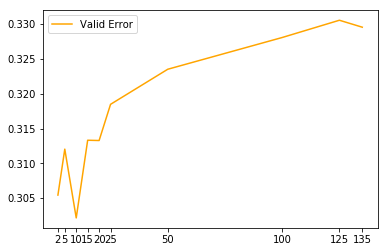

In [4]:
plt.plot(nums,valid_error,  color = 'orange', label = 'Valid Error')
plt.legend()
plt.xticks(nums)
plt.show()

([<matplotlib.axis.XTick at 0x1e684f84390>,
 <a list of 10 Text xticklabel objects>)

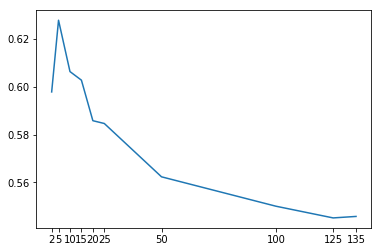

In [5]:
plt.plot(nums, auc)
plt.xticks(nums)

k=20 seems to be the best n_neighbors

In [6]:
weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted = weighted.fit(Xtr, Ytr)
wtr = weighted.predict(Xtr)
wte = weighted.predict(Xte)
print('weighted:')
print('training error:', np.sum(wtr != Ytr)/float(len(Ytr)))
print('validation error:', np.sum(wte != Yte)/float(len(Yte)))

unweighted = KNeighborsClassifier(n_neighbors=5)
unweighted = unweighted.fit(Xtr, Ytr)
utr = weighted.predict(Xtr)
ute = weighted.predict(Xte)
print('unweighted:')
print('training error:', np.sum(utr != Ytr)/float(len(Ytr)))
print('validation error:', np.sum(ute != Yte)/float(len(Yte)))



weighted:
training error: 0.032306666666666664
validation error: 0.30884
unweighted:
training error: 0.032306666666666664
validation error: 0.30884


In [8]:
wroc_auc = sk.metrics.roc_auc_score(Yte, wte)
uroc_auc = sk.metrics.roc_auc_score(Yte, ute)

print(wroc_auc, uroc_auc)

0.6391954694068773 0.6391954694068773


In [34]:
# final test
weighted = KNeighborsClassifier(n_neighbors=20, weights='distance', algorithm='auto')
weighted = weighted.fit(X, Y)
wte = weighted.predict(Xte)
#print('weighted:')
#print('training error:', np.sum(wte != Yfold_2)/float(len(Yfold_2)))
#print('validation error:', np.sum(wte != Y_valid)/float(len(Y_valid)))
#wroc_auc = sk.metrics.roc_auc_score(Y_valid, wte_15)

#print(wroc_auc)

In [25]:
nums = [2,5,10,15,20,25,50,100,125,135]
train_error = []
valid_error = []
auc = []
fpr = []
tpr = []
thresholds = []

for k in nums:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(Xtr, Ytr)
    pred_train = knn.predict(Xtr)
    pred_test = knn.predict(Xte)
    
     ## Get ROC Curve Characteristics
    fpr_temp, tpr_temp, thresholds_temp = roc_curve(Yte,pred_test)
    fpr.append(fpr_temp)
    tpr.append(tpr_temp)
    thresholds.append(thresholds_temp)
    
    ## Get AUC
    roc_auc = sk.metrics.roc_auc_score(Yte, pred_test)
    auc.append(roc_auc)
    
    ## Predict Test and Train Error
    train_error.append(np.sum(pred_train != Ytr)/float(len(Ytr)))
    valid_error.append(np.sum(pred_test != Yte)/float(len(Yte)))

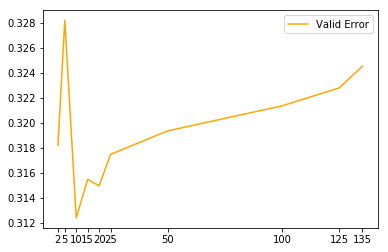

In [36]:
plt.plot(nums,valid_error,  color = 'orange', label = 'Valid Error')
plt.legend()
plt.xticks(nums)
plt.show()

In [158]:
weighted = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1)
weighted = weighted.fit(Xtr,Ytr)
wtr = weighted.predict(Xtr)
wte = weighted.predict(Xte)
final = weighted.predict(X_final)

np.savetxt('KNN_valid.txt',np.vstack( (np.arange(len(wte)) , wte) ).T,
           '%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

np.savetxt('KNN_final.txt',np.vstack( (np.arange(len(final)) , final) ).T,
           '%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

print('training error:', np.sum(wtr != Ytr)/float(len(Ytr)))
print('validation error:', np.sum(wte != Yte)/float(len(Ytr)))
wroc_auc = sk.metrics.roc_auc_score(Yte, wte)
test_auc = sk.metrics.roc_auc_score(Ytr, wtr)
print(wroc_auc, test_auc)

training error: 0.032266666666666666
validation error: 0.09812
0.648034672652899 0.9554869468481377


([<matplotlib.axis.XTick at 0x1e698f78898>,
 <a list of 10 Text xticklabel objects>)

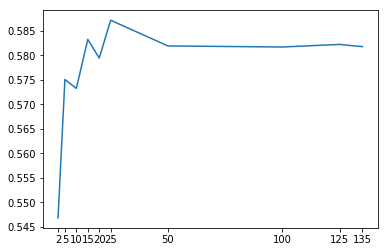

In [28]:
plt.plot(nums, auc)
plt.xticks(nums)

In [56]:
weighted = weighted.fit(X,Y)
yhat = weighted.predict_proba(X_final)

In [58]:
np.savetxt('KNN1.txt',np.vstack( (np.arange(len(yhat)) , yhat[:,1]) ).T,
           '%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

In [156]:
rfc = RandomForestRegressor(max_depth=20, max_features= 7, min_samples_leaf = 7, min_samples_split=7)
rfc = rfc.fit(Xtr, Ytr)
wtr = rfc.predict(Xtr)
wte = rfc.predict(Xte)
final = rfc.predict(X_final)

In [159]:
print('training error:', np.sum(wtr != Ytr)/float(len(Ytr)))
print('validation error:', np.sum(wte != Yte)/float(len(Ytr)))
wroc_auc = sk.metrics.roc_auc_score(Yte, wte)
test_auc = sk.metrics.roc_auc_score(Ytr, wtr)

np.savetxt('RandomForest_valid.txt',np.vstack( (np.arange(len(wte)) , wte) ).T,
           '%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

np.savetxt('RandomForest_final.txt',np.vstack( (np.arange(len(final)) , final) ).T,
           '%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

print(wroc_auc, test_auc)

training error: 0.032266666666666666
validation error: 0.09812
0.648034672652899 0.9554869468481377


In [133]:
rfc = rfc.fit(X,Y)
yhat = rfc.predict(X_final)

In [137]:
np.savetxt('RandomForest.txt',np.vstack( (np.arange(len(yhat)) , yhat) ).T,
           '%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

In [168]:
Pv0=np.genfromtxt('RandomForest_valid.txt',delimiter=',',skip_header=1)[:,1:2]
Pv1=np.genfromtxt('KNN_valid.txt',delimiter=',',skip_header=1)[:,1:2]
Pv2=np.genfromtxt('Adaboost_train.txt',delimiter=',',skip_header=1)[:,1:2]

Pe0=np.genfromtxt('RandomForest_final.txt',delimiter=',',skip_header=1)[:,1:2]
Pe1=np.genfromtxt('KNN_final.txt',delimiter=',',skip_header=1)[:,1:2]
Pe2=np.genfromtxt('Adaboost_pred.txt',delimiter=',',skip_header=1)[:,1:2]

In [174]:
import mltools as ml

Sv=np.hstack((Pv0,Pv1,Pv2))
stack=ml.linearC.linearClassify(Sv,Yte,reg=1e-3)
print("** Stacked AUC: ",stack.auc(Sv,Yte))
Se=np.hstack((Pe0,Pe1,Pe2))
PeS=stack.predictSoft(Se)



** Stacked AUC:  0.7244268202158342


In [181]:
def toKaggle(filename,prSoft):
    fh=open(filename,'w')
    fh.write('ID,Prob1\n')
    for i,yi in enumerate(prSoft[:,1].ravel()):
        fh.write('{}, {}\n'.format(i,yi))
    fh.close()

In [182]:
toKaggle('stack.txt',PeS)

In [176]:
PeS

array([[0.78560465, 0.21439535],
       [0.78560465, 0.21439535],
       [0.78524261, 0.21475739],
       ...,
       [0.42296971, 0.57703029],
       [0.42401867, 0.57598133],
       [0.78560465, 0.21439535]])

(100000, 14)
(100000,)


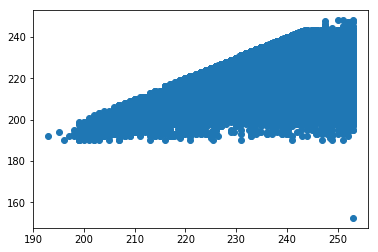

In [5]:
print(X.shape)
print(Y.shape)
plt.figure()
plt.scatter(X[:, 0], X[:, 1])